# Dimensionality Reduction

## PCA

PCA stands for Principal Component Analysis. It is a statistical technique used in the field of machine learning and data analysis to emphasize variation and bring out strong patterns in a dataset. PCA is commonly used as a method of dimensionality reduction, especially in contexts where there are many variables or features, but not all of them are equally useful for analysis.

3


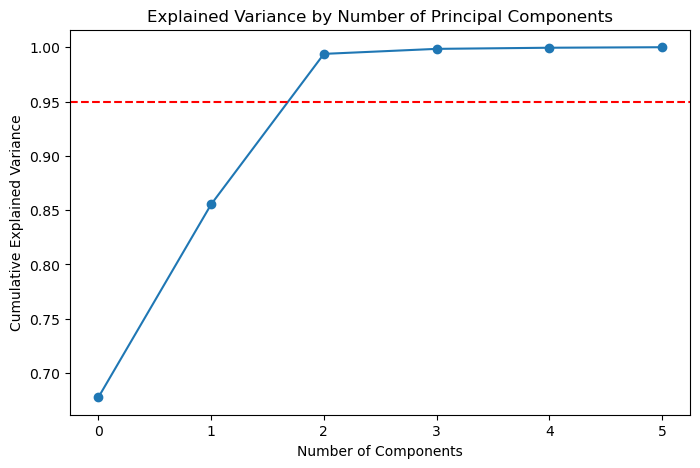

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

AAPL = pd.read_csv('AAPL_Cleaned.csv')

AAPL = AAPL.drop('timestamp', axis=1)
AAPL = AAPL.drop('Unnamed: 0', axis=1)
AAPL = AAPL.dropna()

scaler = StandardScaler()
scaled_df = scaler.fit_transform(AAPL)

pca = PCA()
pca.fit(scaled_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

print(optimal_num_components)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()


The optimal components would be 2 as the first one explains 85%, the second one explains 15%, and adding more does not increase it significantly. 

## t-SNE

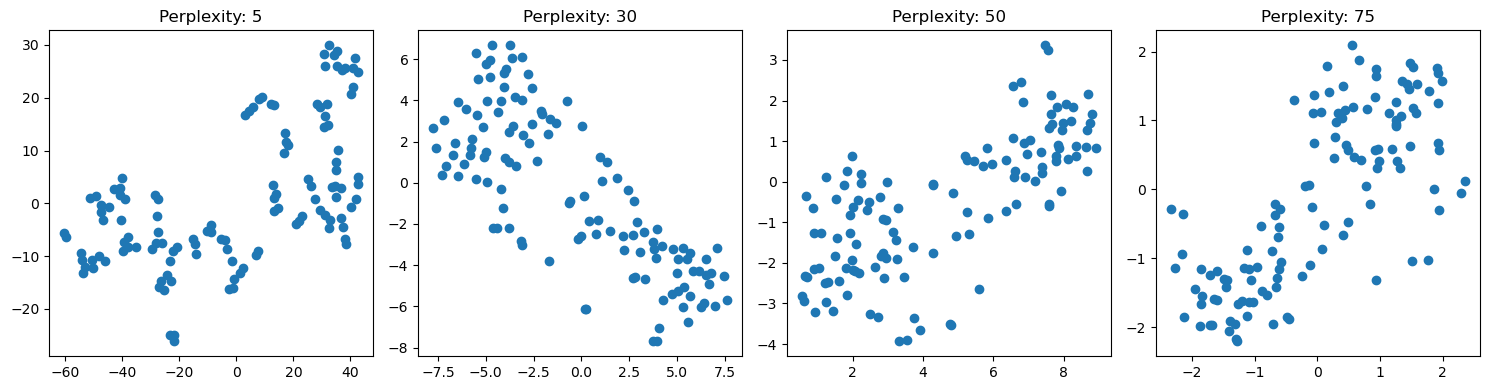

In [2]:
from sklearn.manifold import TSNE


perplexities = [5, 30, 50, 75]
fig, axes = plt.subplots(1, len(perplexities), figsize=(15, 4))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(scaled_df)
    axes[i].scatter(tsne_result[:, 0], tsne_result[:, 1])
    axes[i].set_title(f'Perplexity: {perplexity}')
plt.tight_layout()
plt.show()

With the increase of perplexity, the points become more dense and the clusers are more clear. However, when the perplexity increase more than 50, the clusters are merging into 1, which cannot represent the structure of points.

## Evaluation and Comparison

The PCA plot is effective as it clearly shows the elbow in the plot, and gives a clear result that the optimal number of components is 2. The t-SNE is also effective as we can see a significant increase in the clustering when the perplexity goes up, and we can also see the merging in clusters when the perplexity goes too high, so it also gives a kindly proper range of perplexity which is around 50.

The dimensionality reduction is firstly done by using PCA, and the plot shows that the optimal number of components is 2. Then I use 2 as the number of components, apply t-SNE with different perplexity, and find out a clearer cluster plot with perplexity = 50. 